# Exercise 3: The development of classification models for mode choices

Transportation mode choice is a critical decision-making process that individuals, businesses, and urban planners face daily. It involves selecting the most suitable mode of transportation for a given journey/trip, taking into account factors such as cost, time, convenience, and environmental impact. In this tutorial, we will explore how to address the mode choice problem using classification models.

Key points to cover:

* Mode choice problem;
* Encoding techniques for categorical variables;
* Classification models training;
* Classification models evaluation;
* Hyperparameter Tuning to find the best model (assignment);

By the end of this tutorial, you will have a comprehensive understanding of how to leverage classification models to tackle the transportation mode choice problem. Whether you are a data scientist, transportation planner, or enthusiast, this tutorial will equip you with the knowledge and practical skills to make informed decisions in the realm of transportation planning and modeling.








In [24]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
# Load the data use the pandas
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            3080 non-null   int64 
 1   time_car      3080 non-null   int64 
 2   cost_car      3080 non-null   int64 
 3   time_bus      3080 non-null   int64 
 4   cost_bus      3080 non-null   int64 
 5   access_bus    3080 non-null   int64 
 6   time_air      3080 non-null   int64 
 7   cost_air      3080 non-null   int64 
 8   access_air    3080 non-null   int64 
 9   service_air   3080 non-null   object
 10  time_rail     3080 non-null   int64 
 11  cost_rail     3080 non-null   int64 
 12  access_rail   3080 non-null   int64 
 13  service_rail  3080 non-null   object
 14  choice        3080 non-null   object
dtypes: int64(12), object(3)
memory usage: 361.1+ KB


In [25]:
data.describe()

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,time_rail,cost_rail,access_rail
count,3080.00000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000,3080.000000
mean,1540.50000,312.725649,40.024351,370.724026,24.965909,15.094156,69.866883,80.029221,45.060065,142.878247,54.944805,14.840909
std,889.26374,50.390302,7.083073,37.369174,7.100207,7.099092,14.241063,21.254481,7.073683,17.727864,14.069500,7.089921
min,1.00000,250.000000,30.000000,300.000000,15.000000,5.000000,50.000000,50.000000,35.000000,120.000000,35.000000,5.000000
25%,770.75000,275.000000,35.000000,345.000000,20.000000,10.000000,60.000000,65.000000,40.000000,130.000000,45.000000,10.000000
50%,1540.50000,300.000000,40.000000,390.000000,25.000000,15.000000,70.000000,80.000000,45.000000,140.000000,55.000000,15.000000
75%,2310.25000,345.000000,45.000000,390.000000,30.000000,20.000000,80.000000,95.000000,50.000000,155.000000,65.000000,20.000000
max,3080.00000,390.000000,50.000000,420.000000,35.000000,25.000000,90.000000,110.000000,55.000000,170.000000,75.000000,25.000000


In [26]:
# Perform a grouping operation on the 'data' DataFrame based on the 'choice' column
# and then calculate the size of each group
data.groupby('choice').size()

choice
air      705
bus      109
car      978
rail    1288
dtype: int64

Our dataset consists of various variables that encapsulate the factors influencing mode choice decisions. Let's take a closer look at the key variables:

* **ID (Unique individual ID)**: Ranging from 1 to 3080, this variable allows us to uniquely identify each individual in our study.

* **Travel Time and Cost for Different Modes**: For each mode of transportation (car, bus, air, and rail), we have data on travel time (in minutes) and travel cost (in pounds). These factors are pivotal in shaping the decision-making process, as individuals seek the most time-efficient and cost-effective options.

* **Access Time**: Access time (in minutes) represents the time it takes to reach the transportation mode, which is especially relevant for modes like bus and rail. Shorter access times may sway the choice in favor of these modes.

* **Service Quality**: For air and rail travel, we have a categorical variable indicating service quality. This offers insights into passenger preferences, as different individuals may prioritize features such as "no-frills," "wifi," or "food" services.

* **Choice (Selected Travel Mode)**: This is our target variable, representing the ultimate mode of transportation selected by individuals. It's a categorical variable with options including "car," "bus," "air," and "rail."

# Assignment task - Find the best classification model for the travel mode choices prediction (assignment submission)

Welcome to this challenging homework assignment.
Your task is to analyze the provided dataset, which contains valuable information about individuals' choices of travel mode. The ultimate goal is to find the best classification model and the corresponding hyperparameters that accurately predicts these choices using the grid search.

**Good Luck!**

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.5746753246753247
Precision: [0.57462687 0.         0.4841629  0.651341  ]
Recall: [0.55797101 0.         0.54314721 0.65637066]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


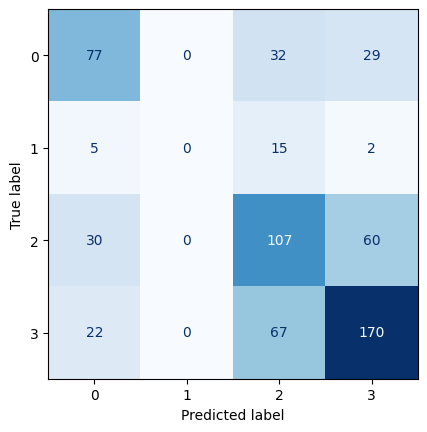

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise-3%20mode%20choice%20model/modeChoiceData.csv'
data = pd.read_csv(url)

##---------------------The choice of encoding method---------------------------
#(1) One-Hot Encoding
df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
# encoder = LabelEncoder()
# df=data.copy()
# df['service_air'] = encoder.fit_transform(df['service_air'])
# df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

x = df.drop(['choice','ID',], axis=1)
y = df['choice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

##---------------------The choice of classification model---------------------------
#(1)LR
# params = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
# }
# model = LogisticRegression(max_iter=1000, random_state=0)

#(2)KNN
# params = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
# }
# model=KNeighborsClassifier()

#(3)RF
# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# model = RandomForestClassifier(random_state=0)

#(4)XGBoost
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}
map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
y_train = y_train.map(map)
y_test = y_test.map(map)
model =  XGBClassifier()

#(5)SVM
## Note: It will costs a long time.
# params = {
#     'C': [0.1, 1, 10],
# }


# model= SVC(kernel="linear")

# Initialize a GridSearchCV object to perform hyperparameter tuning
# - 'estimator': The machine learning model (in this case, 'model') to be tuned.
# - 'param_grid': A dictionary specifying the hyperparameter grid to search.
# - 'cv': The number of cross-validation folds (here, 5-fold cross-validation is used).
# - 'scoring': The evaluation metric used to compare different hyperparameter settings
# --('accuracy','precision','recall, etc. see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data to perform hyperparameter tuning
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters identified by the grid search
best_params = grid_search.best_params_
print(best_params)
# Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
best_score = grid_search.best_score_

# Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)


##---------------------Different measurements---------------------------
print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')